###목표
- 얼굴을 분류하는 이진 분류 신경망 모델을 만들어보자

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# PIL : Python Image Library (이미지 처리 라이브러리)
from PIL import Image

In [ ]:
%cd /content/drive/MyDrive/sw캠프 데이터 비즈니스 과정

/content/drive/MyDrive/sw캠프 데이터 비즈니스 과정


In [ ]:
%pwd

'/content/drive/MyDrive/sw캠프 데이터 비즈니스 과정'

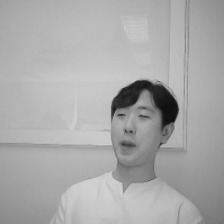

In [ ]:
# 이미지를 가져와 흑백으로 변환
# convert → L(Luminous) : 흑백, RGB : 컬러
img = Image.open('data/Class 1-samples/0.jpg').convert('L')
img

In [ ]:
# 불러온 이미지 데이터를 numpy배열로 변환
# 이미지 데이터 → 수치형 데이터로 변환시키는 과정
# 가로(행), 세로(열) 픽셀수로 변경됨
# 학습용 데이터는 사전에 다 수치 데이터로 변환되어져 있는 상태
img_array = np.array(img)

In [ ]:
img_array.shape

(224, 224)

In [ ]:
img_array

array([[159, 159, 160, ..., 139, 139, 138],
       [159, 160, 160, ..., 141, 139, 138],
       [159, 160, 160, ..., 142, 140, 139],
       ...,
       [138, 137, 137, ..., 119, 118, 118],
       [137, 136, 136, ..., 118, 118, 118],
       [136, 135, 135, ..., 118, 118, 119]], dtype=uint8)

- 이미지 데이터를 수치형 데이터로 변환시켜보자

In [ ]:
# 진행 정도를 알려주는 라이브러리
from tqdm import tqdm

In [ ]:
# 데이터셋 구성하기
class1_list=[]
class2_list=[]

for i in tqdm(range(0,200,1)):
  # 이미지 데이터 가져오기
  img1 = Image.open('data/Class 1-samples/'+str(i)+'.jpg').convert('L')

  # 이미지 데이터 numpy 배열로 변환
  img_array1 = np.array(img1)

  # 변환된 배열 데이터를 빈리스트에 하나씩 추가하기
  class1_list.append(img_array1)

  # 이미지 데이터 가져오기
  img2 = Image.open(f'data/Class 1-samples/{i}.jpg').convert('L')

  # 이미지 데이터 numpy 배열로 변환
  img_array2 = np.array(img2)

  # 변환된 배열 데이터를 빈리스트에 하나씩 추가하기
  class2_list.append(img_array2)

100%|██████████| 200/200 [00:00<00:00, 227.63it/s]


In [ ]:
# 기계 학습을 위한 데이터 변환 (리스트 -> numpy배열로 변환)
class1_array = np.array(class1_list)
class2_array = np.array(class2_list)

In [ ]:
class1_array.shape, class2_array.shape

((200, 224, 224), (200, 224, 224))

In [ ]:
# 두개의 배열 합치기(문제 데이터 생성)
data = np.concatenate([class1_array, class2_array])

In [ ]:
data.shape

(400, 224, 224)

In [ ]:
# 정답 데이터 만들기(문제와 정답의 순서를 일치시켜줘야함)
# 0 : 호준 데이터 정답
# 1 : 지현 데이터 정답
target = np.array([0]*200+[1]*200)

In [ ]:
target.shape

(400,)

In [ ]:
# 학습, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 224, 224), (80, 224, 224), (320,), (80,))

- 신경망 모델링

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential()

model.add(Flatten(input_shape =(224, 224)))

model.add(Dense(160, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))

# 이진분류의 결과값은  0 or 1 값이기 때문에 1이다.
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 160)               8028320   
                                                                 
 dense_1 (Dense)             (None, 80)                12880     
                                                                 
 dense_2 (Dense)             (None, 40)                3240      
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 1

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['acc']
)

In [ ]:
h = model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=128)
# validation_split : 신경망 학습시 자동으로 train 데이터에서 val데이터를 분리시켜주는 명령어
# 주의점 : 분리 시켜줄때 뒤에서부터 일정%를 잘라주기 떄문에 랜덤하게 샘플링이 되어져 있는 데이터에만 사용할

Epoch 1/300
2/2 [==============================] - 11s 388ms/step - loss: 114.1788 - acc: 0.5195 - val_loss: 1676.0820 - val_acc: 0.3750
Epoch 2/300
2/2 [==============================] - 0s 85ms/step - loss: 633.5613 - acc: 0.5117 - val_loss: 2319.6296 - val_acc: 0.3750
Epoch 3/300
2/2 [==============================] - 0s 63ms/step - loss: 1395.2831 - acc: 0.5508 - val_loss: 1623.1897 - val_acc: 0.3750
Epoch 4/300
2/2 [==============================] - 0s 55ms/step - loss: 939.3832 - acc: 0.5508 - val_loss: 225.2932 - val_acc: 0.6250
Epoch 5/300
2/2 [==============================] - 0s 57ms/step - loss: 222.9493 - acc: 0.4492 - val_loss: 1098.1611 - val_acc: 0.3750
Epoch 6/300
2/2 [==============================] - 0s 71ms/step - loss: 740.4440 - acc: 0.5508 - val_loss: 428.0034 - val_acc: 0.3750
Epoch 7/300
2/2 [==============================] - 0s 68ms/step - loss: 417.4089 - acc: 0.4570 - val_loss: 248.4030 - val_acc: 0.6250
Epoch 8/300
2/2 [==============================] - 0s 6

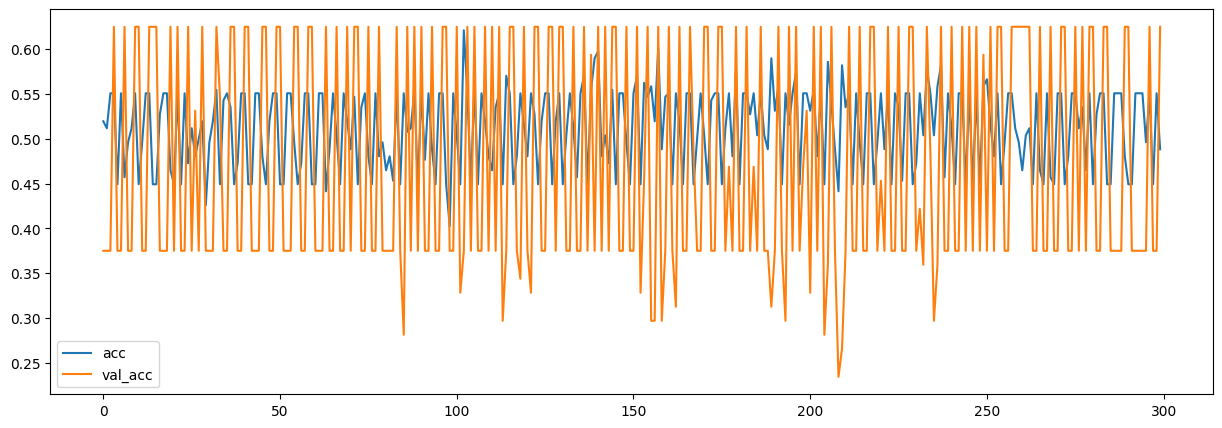

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(h.history['acc'], label='acc')
plt.plot(h.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

- 학습과 검증에 사용한 데이터 자체가 고정된 각도에서 큰 변동이 없는 상태로 찍혀진 사진이었기 때문에 기계 입장에서는 쉽게 인식이 되고 분류 할 수 있었던 문제였음